### Import Data and Libraries

---

In [1]:
from functions.data_training import *

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


In [2]:
df_feats = pd.read_csv("csv_data/ehz_statistical_data.csv")
df_feats.head()

,Date,Data Quality,Standard Deviation,Peak-to-Peak Amplitude,Root Mean Square (RMS),Total PSD,Mean PSD,Signal-to-Noise Ratio (SNR),Median Absolute Deviation (MAD),Kurtosis,Skewness,Interquartile Range (IQR),Autocorrelation Peak,Wavelet Energy
0,2024-04-01,D,2454.7177,35366,16380.1884,1.537425e+07,119180.2158,13.5580,1444.0,1.8955,0.0155,2889.0,6,3.225206e+13
1,2024-04-02,D,2913.0334,43300,16455.2612,2.176845e+07,168747.7038,12.4046,1632.0,2.5621,-0.0133,3264.0,9,3.253164e+13
2,2024-04-03,D,2632.3041,44694,16406.4488,1.771743e+07,137344.4337,14.7643,1487.0,2.7349,0.0104,2974.0,5,3.236244e+13
3,2024-04-04,D,2242.6890,36496,16348.7703,1.293083e+07,100238.9651,15.3766,1348.0,1.8717,0.0278,2696.0,8,3.210649e+13
4,2024-04-05,D,2943.8699,44608,16461.1435,2.215907e+07,171775.7235,12.8759,1620.0,3.1061,0.0145,3240.0,7,3.256437e+13


In [3]:
df_inputs = pd.read_csv("csv_data/data_labels.csv")
df_inputs.head()

,Date,Day of Week,Is Class,Is Remote Synchronous
0,4/1/24,Monday,True,False
1,4/2/24,Tuesday,True,False
2,4/3/24,Wednesday,True,False
3,4/4/24,Thursday,True,False
4,4/5/24,Friday,True,False


### Data Preparation

---

In [4]:
# Merge two dataframes, mapped with 'Date' column
df_merged = merge_dataframes(df_feats, df_inputs, 'Date')
df_merged.head()

,Standard Deviation,Peak-to-Peak Amplitude,Root Mean Square (RMS),Total PSD,Mean PSD,Signal-to-Noise Ratio (SNR),Median Absolute Deviation (MAD),Kurtosis,Skewness,Interquartile Range (IQR),Autocorrelation Peak,Wavelet Energy,Day of Week,Is Class,Is Remote Synchronous
0,2454.7177,35366,16380.1884,1.537425e+07,119180.2158,13.5580,1444.0,1.8955,0.0155,2889.0,6,3.225206e+13,Monday,True,False
1,2913.0334,43300,16455.2612,2.176845e+07,168747.7038,12.4046,1632.0,2.5621,-0.0133,3264.0,9,3.253164e+13,Tuesday,True,False
2,2632.3041,44694,16406.4488,1.771743e+07,137344.4337,14.7643,1487.0,2.7349,0.0104,2974.0,5,3.236244e+13,Wednesday,True,False
3,2242.6890,36496,16348.7703,1.293083e+07,100238.9651,15.3766,1348.0,1.8717,0.0278,2696.0,8,3.210649e+13,Thursday,True,False
4,2943.8699,44608,16461.1435,2.215907e+07,171775.7235,12.8759,1620.0,3.1061,0.0145,3240.0,7,3.256437e+13,Friday,True,False


In [5]:
# Convert 'Day of Week' to a numerical representation
df = convert_day_to_numeric(df_merged, 'Day of Week')
df.head()

,Standard Deviation,Peak-to-Peak Amplitude,Root Mean Square (RMS),Total PSD,Mean PSD,Signal-to-Noise Ratio (SNR),Median Absolute Deviation (MAD),Kurtosis,Skewness,Interquartile Range (IQR),Autocorrelation Peak,Wavelet Energy,Day of Week,Is Class,Is Remote Synchronous
0,2454.7177,35366,16380.1884,1.537425e+07,119180.2158,13.5580,1444.0,1.8955,0.0155,2889.0,6,3.225206e+13,0,True,False
1,2913.0334,43300,16455.2612,2.176845e+07,168747.7038,12.4046,1632.0,2.5621,-0.0133,3264.0,9,3.253164e+13,1,True,False
2,2632.3041,44694,16406.4488,1.771743e+07,137344.4337,14.7643,1487.0,2.7349,0.0104,2974.0,5,3.236244e+13,2,True,False
3,2242.6890,36496,16348.7703,1.293083e+07,100238.9651,15.3766,1348.0,1.8717,0.0278,2696.0,8,3.210649e+13,3,True,False
4,2943.8699,44608,16461.1435,2.215907e+07,171775.7235,12.8759,1620.0,3.1061,0.0145,3240.0,7,3.256437e+13,4,True,False


In [6]:
# Data Splitting
X_train, X_test, y_train, y_test = split_data(df, 'Is Class')

### Model Training and Evaluation

---

In [7]:
clf, y_pred = train_random_forest(X_train, y_train, X_test)

In [8]:
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

Accuracy: 0.71
Precision: 0.6
Recall: 0.6
F1 Score: 0.6


In [9]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]

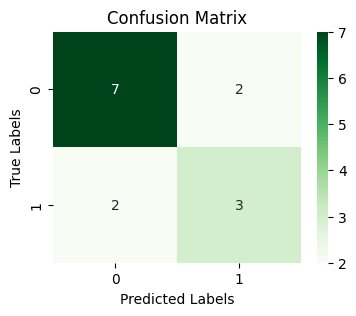

In [10]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, figsize=(4, 3), cmap='Blues'):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_test, y_pred, cmap='Greens')

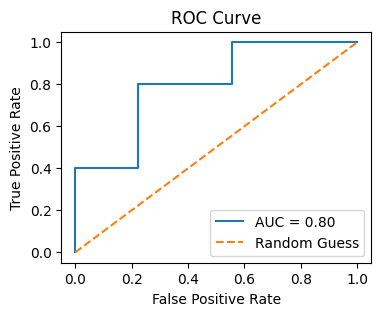

In [11]:
# ROC Curve
def plot_roc_curve(y_test, y_pred_proba, figsize=(4, 3)):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(y_test, y_pred_proba)

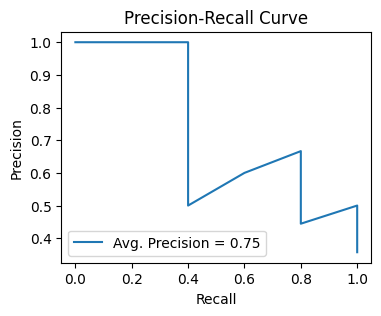

In [12]:
# Precision Recall Curve
def plot_precision_recall_curve(y_test, y_pred_proba, figsize=(4, 3)):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    plt.figure(figsize=figsize)
    plt.plot(recall, precision, label=f'Avg. Precision = {avg_precision:.2f}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()

plot_precision_recall_curve(y_test, y_pred_proba)

### Model Testing (Outside Train/Test)

---

In [13]:
df_test = pd.read_csv("csv_data/test_ehz_statistical_data.csv")
df_test.head()

,Date,Data Quality,Standard Deviation,Peak-to-Peak Amplitude,Root Mean Square (RMS),Total PSD,Mean PSD,Signal-to-Noise Ratio (SNR),Median Absolute Deviation (MAD),Kurtosis,Skewness,Interquartile Range (IQR),Autocorrelation Peak,Wavelet Energy
0,2024-05-18,D,2436.6725,41251,16384.4307,1.522036e+07,117987.2550,14.4939,1423.0,2.2288,-0.0210,2846.0,8,3.225547e+13
1,2024-05-19,D,1727.0901,31264,16295.1009,7.613222e+06,59017.2232,18.5619,833.0,5.7318,0.0004,1665.0,7,3.191307e+13
2,2024-05-20,D,2412.0622,29523,16380.7832,1.485626e+07,115164.8272,12.9313,1459.0,1.3856,-0.0215,2918.0,5,3.226290e+13
3,2024-05-21,D,2979.4640,51672,16475.6825,2.273977e+07,176277.3002,14.6983,1751.0,2.6247,0.0153,3501.0,6,3.261738e+13
4,2024-05-22,D,2578.8843,37098,16415.3213,1.698792e+07,131689.3211,14.0949,1565.0,1.4430,-0.0213,3129.0,6,3.240496e+13


In [14]:
# Merge two dataframes, mapped with 'Date' column
df_test_merged = merge_dataframes(df_test, df_inputs, 'Date')
df_test_merged.head()

ValueError: time data "2024-04-01" doesn't match format "%m/%d/%y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.